# Comparison of KNN and Classification Trees on Continuous Datasets
In this notebook I'll demonstrate my implementations so far whilst comparing their performance on complete datasets comprised of continuous datasets.
In the cell below, I'll import my implementations thus far

In [2]:
import numpy as np
import sys
sys.path.append("..")
from knn import KNearestNeighbours
from classification_tree import ClassificationTree
from cross_validation import k_folds_accuracy_score, leave_one_out_score
from train_test_split import train_test_split

Now we'll start with the iris dataset and load this dataset into training and testing. We'll initially try and tune our hyperparameters to find the best values for this dataset - Finding the best k for KNN and the best maximum depth for the tree.

### Loading Iris

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, seed=4567)
print("Training set size:",X_train_iris.shape)
print("Test set size:",X_test_iris.shape)

Training set size: (113, 4)
Test set size: (37, 4)


## Tuning the Hyperparameters
### Finding optimal K for KNN

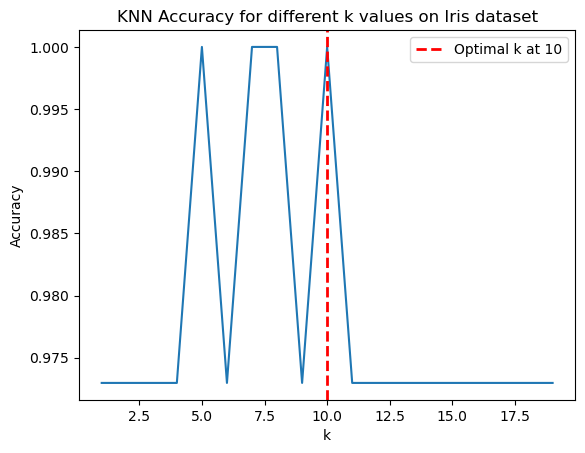

The best value of k is: 10


In [4]:
import matplotlib.pyplot as plt
accuracies = []

# Looping from k=1 to k=20
for k in range(1, 20):
    tree_tune = KNearestNeighbours(k)
    tree_tune.fit(X_train_iris, y_train_iris)
    y_pred_iris = tree_tune.predict(X_test_iris)
    accuracy = np.mean(y_test_iris == y_pred_iris)
    accuracies.append(accuracy)

# Plotting the results
plt.plot(range(1, 20), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Iris dataset')

# Finding the best k value
# Find the highest index with the maximum accuracy value
max_accuracy = max(accuracies)
# Reverse the list to find the last occurrence of the max accuracy
reverse_index = accuracies[::-1].index(max_accuracy)
# Convert this index to the original index
best_k = len(accuracies) - reverse_index

# Add a vertical line at the best k value
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k at {best_k}')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


print(f"The best value of k is: {best_k}")


### Finding optimal tree depth

1 : actual depth =  1 accuracy:  0.6486486486486487
2 : actual depth =  2 accuracy:  0.9459459459459459
3 : actual depth =  3 accuracy:  0.972972972972973
4 : actual depth =  4 accuracy:  0.972972972972973
5 : actual depth =  5 accuracy:  0.972972972972973
6 : actual depth =  5 accuracy:  0.972972972972973
7 : actual depth =  5 accuracy:  0.972972972972973
8 : actual depth =  5 accuracy:  0.972972972972973
9 : actual depth =  5 accuracy:  0.972972972972973
10 : actual depth =  5 accuracy:  0.972972972972973


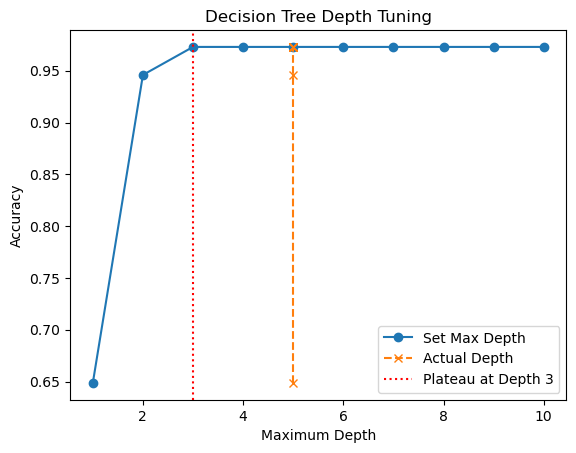

In [5]:
accuracies = []

# Looping from k=1 to k=10
actual_maximum = 0
for d in range(1, 11):
    tree_tune = ClassificationTree(max_depth=d)
    tree_tune.fit(X_train_iris, y_train_iris)
    y_pred_iris = tree_tune.predict(X_test_iris)
    accuracy = np.mean(y_test_iris == y_pred_iris)
    accuracies.append(accuracy)
    print(d,": actual depth = ",tree_tune.get_depth(), "accuracy: ", accuracy)
    if tree_tune.get_depth() > actual_maximum: actual_maximum = tree_tune.get_depth()

# Assuming you have max_depths, actual_depths, and accuracies lists ready
max_depths = range(1, 11)
actual_depths = [actual_maximum] * 10 

# Create a line plot for set maximum depths
plt.plot(max_depths, accuracies, label='Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_depths, accuracies, label='Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Highlight the plateau point - assuming the plateau starts at max_depth=3
plateau_depth = 3
plt.axvline(x=plateau_depth, color='red', linestyle=':', label=f'Plateau at Depth {plateau_depth}')

# Add a legend to differentiate between set depth and actual depth
plt.legend()

# Show the plot
plt.show()


We'll use k of 10 for KNN moving forwards and we'll set a maximum depth of 5.
We'll now reshuffle the dataset.

## Model Validation
We'll now perform Cross-Validation on these models upon the iris dataset

In [6]:
%%timeit -r 1 -n 1
X, y = iris.data, iris.target
knn = KNearestNeighbours(k=10)
tree = ClassificationTree(max_depth=5)

print("5-Folds - knn -iris - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=2345))
print("10-Folds - knn - iris - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=2345))
print("Leave-One-Out - knn - iris - accuracy", leave_one_out_score(knn, X, y, seed=2345))
print("")
print("5-Folds - tree -iris - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=2345))
print("10-Folds - tree - iris - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=2345))
print("Leave-One-Out - tree - iris - accuracy", leave_one_out_score(tree, X, y, seed=2345))


5-Folds - knn -iris - accuracy 0.9666666666666668
10-Folds - knn - iris - accuracy 0.9733333333333334
Leave-One-Out - knn - iris - accuracy 0.96

5-Folds - tree -iris - accuracy 0.9200000000000002
10-Folds - tree - iris - accuracy 0.9333333333333333
Leave-One-Out - tree - iris - accuracy 0.9333333333333333
2.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Here we see that KNN performs slightly better and overall both models perform quite well. It's worth noting that for now, LOOCV takes quite a while to execute on the tree.

Just for demonstration purposes, I'll print an example of the tree on some fitted data. 

In [14]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, seed=2345)
tree_toprint = ClassificationTree(max_depth=5)
tree_toprint.fit(X_train_iris,y_train_iris)
pred_toprint = tree_toprint.predict(X_test_iris)
acc_toprint = np.mean(pred_toprint == y_test_iris)
print("accuracy = ",acc_toprint)
tree_toprint.print_tree(feature_names = iris.feature_names)


accuracy =  0.972972972972973
petal length (cm) <= 3.0
Left:
|   --> Class: 0.0
Right:
|   petal width (cm) <= 1.8
|   Left:
|   |   petal length (cm) <= 5.0
|   |   Left:
|   |   |   petal width (cm) <= 1.7
|   |   |   Left:
|   |   |   |   --> Class: 1.0
|   |   |   Right:
|   |   |   |   --> Class: 2.0
|   |   Right:
|   |   |   petal width (cm) <= 1.6
|   |   |   Left:
|   |   |   |   --> Class: 2.0
|   |   |   Right:
|   |   |   |   --> Class: 1.0
|   Right:
|   |   petal length (cm) <= 4.9
|   |   Left:
|   |   |   sepal length (cm) <= 6.0
|   |   |   Left:
|   |   |   |   --> Class: 1.0
|   |   |   Right:
|   |   |   |   --> Class: 2.0
|   |   Right:
|   |   |   --> Class: 2.0


Above, we can see an example of a constructed tree with maximum depth set to 5. This tree has a 97% accuracy rate on predictions in the iris dataset